In [3]:
from collections import Counter

import math, random

 

def random_kid():

    return random.choice(["boy", "girl"])

 

kid_test_list = [random_kid() for i in range(10)]

kid_test_list #random_kid 함수는 boy와 girl 두개의 값중에 하는 램덤하게 추출함

 

both_girls = 0

older_girl = 0

either_girl = 0

 

random.seed(0)

for _ in range(10000):

    younger = random_kid()

    older = random_kid()

    if older == "girl": # 큰 아이가 여자일 경우 +1

        older_girl += 1

    if older == "girl" and younger == "girl": #둘다 여자일 경우 +1

        both_girls += 1

    if older == "girl" or younger == "girl": #둘중에 하나라도 여자일경우 +1

        either_girl += 1

 

print ("P(both | older):", both_girls / older_girl)      # 0.514 ~ 1/2 #큰 아이가 딸이고 둘다 딸일 확률

print ("P(both | either): ", both_girls / either_girl)   # 0.342 ~ 1/3 # 둘중에 한명이 딸이면서 둘 따 딸일 확률

3

P(both | older): 0.5007089325501317
P(both | either):  0.3311897106109325


3

Populating the interactive namespace from numpy and matplotlib


C:\Users\youngjoo\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


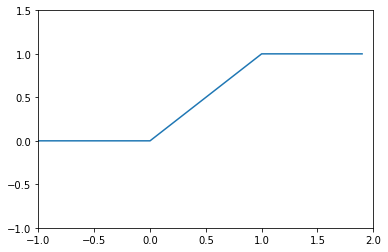

In [4]:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

def uniform_cdf(x):
    "returns the probability that a uniform random variable is less than x"
    if x < 0:   
        return 0    # uniform random is never less than 0
    elif x < 1: 
        return x    # e.g. P(X < 0.4) = 0.4
    else:       
        return 1    # uniform random is always less than 1

import numpy as np
x = np.arange(-1.0, 2.0, 0.1)

result_array = np.vectorize(uniform_cdf, otypes=[np.float])(x)

import matplotlib.pyplot as plt
%pylab inline

plt.plot(x, result_array)
plt.axis([-1, 2, -1, 1.5])
plt.show()

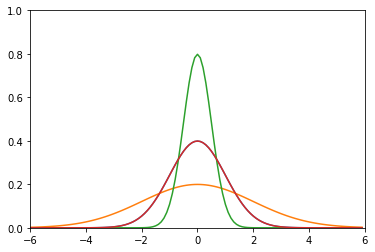

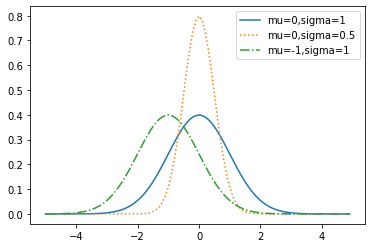

In [5]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

for sigma_value in [1,2,0.5,1]:
    x = np.arange(-6.0, 6.0, 0.1)
    result_array = np.vectorize(normal_pdf, otypes=[np.float])(x, sigma=sigma_value)
#     plt.plot(x, result_array, "ro")
    plt.plot(x, result_array)
    
plt.axis([-6, 6, 0, 1])
plt.show()

def plot_normal_pdfs(plt):
    xs = [x / 10.0 for x in range(-50, 50)]
    plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
    plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
    plt.plot(xs,[normal_pdf(x,mu=-1)   for x in xs],'-.',label='mu=-1,sigma=1')
    plt.legend()
    plt.show()   

import matplotlib.pyplot as plt
plot_normal_pdfs(plt)

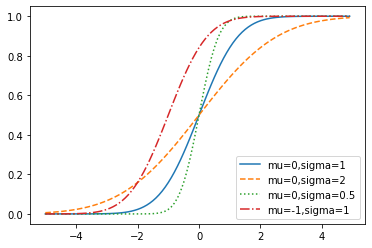

In [6]:
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

def plot_normal_cdfs(plt):
    xs = [x / 10.0 for x in range(-50, 50)]
    plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
    plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
    plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
    plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
    plt.legend(loc=4) # bottom right
    plt.show()

import matplotlib.pyplot as plt
plot_normal_cdfs(plt)

In [7]:
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find approximate inverse using binary search"""

    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0            # normal_cdf(-10) is (very close to) 0
    hi_z,  hi_p  =  10.0, 1                # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # consider the midpoint
        mid_p = normal_cdf(mid_z)   # and the cdf's value there
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break

    return mid_z

np.vectorize(inverse_normal_cdf, otypes=[np.float])([0, 0.5, 0.90, 0.95, 0.975, 1])
# 0%, 50%, 90%, 95%, 97.5%, 100%의 확률일경우 누적분포의 확률변수값

array([-8.75      ,  0.        ,  1.28155708,  1.64484978,  1.95996284,
        8.75      ])

C:\Users\youngjoo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """


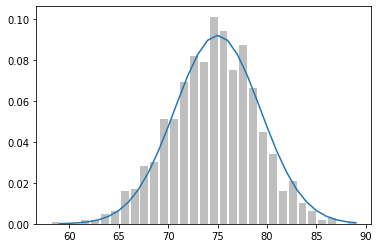

C:\Users\youngjoo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """


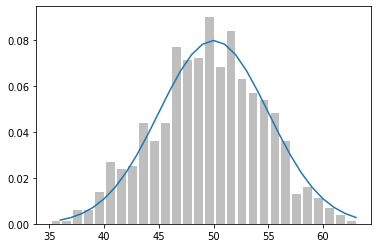

In [10]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(p, n):
    return sum(bernoulli_trial(p) for _ in range(n))

def make_hist(p, n, num_points):
    
    data = [binomial(p, n) for _ in range(num_points)]
    
    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')
    
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) 
          for i in xs]
    plt.plot(xs,ys)
    plt.show()

make_hist(0.75,100,1000)
make_hist(0.50,100,1000)